Import reqiured libraries

In [149]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.datasets import cifar10
from keras import models, layers
from keras.optimizers import Adam
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Load the cifar10 dataset

In [150]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [151]:
train_images.shape

(50000, 32, 32, 3)

In [152]:
train_labels[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [153]:
test_images.shape

(10000, 32, 32, 3)

In [154]:
test_labels[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [155]:
train_labels = train_labels.reshape(-1,)
test_labels = test_labels.reshape(-1,)

Normalizing the data

In [156]:
train_labels

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [157]:
train_images = train_images.astype('float32')/255.0
test_images = test_images.astype('float32')/255.0

In [158]:
train_images[0][0][0]

array([0.23137255, 0.24313726, 0.24705882], dtype=float32)

Split the data train and validation set

In [159]:
train_images, valid_images, train_labels, valid_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42, shuffle=True)

CNN Model Building

In [160]:
def create_cnn_model():
    cnn_model = models.Sequential()
    cnn_model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3), padding="Same"))
    cnn_model.add(layers.MaxPooling2D(2,2))
    cnn_model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding="Same"))
    cnn_model.add(layers.MaxPooling2D(2,2))
    cnn_model.add(layers.Flatten())
    cnn_model.add(layers.Dense(64, activation='relu'))
    cnn_model.add(layers.Dropout(0.5))
    cnn_model.add(layers.Dense(10, activation='softmax'))
    return cnn_model

Epoch 1/20
1250/1250 [==============================] - 25s 18ms/step - loss: 1.7269 - accuracy: 0.3582 - val_loss: 1.4229 - val_accuracy: 0.5023
Epoch 2/20
1250/1250 [==============================] - 19s 15ms/step - loss: 1.4552 - accuracy: 0.4670 - val_loss: 1.2090 - val_accuracy: 0.5719
Epoch 3/20
1250/1250 [==============================] - 19s 15ms/step - loss: 1.3322 - accuracy: 0.5139 - val_loss: 1.1260 - val_accuracy: 0.6092
Epoch 4/20
1250/1250 [==============================] - 18s 15ms/step - loss: 1.2563 - accuracy: 0.5430 - val_loss: 1.0889 - val_accuracy: 0.6184
Epoch 5/20
1250/1250 [==============================] - 18s 14ms/step - loss: 1.1979 - accuracy: 0.5655 - val_loss: 1.0540 - val_accuracy: 0.6289
Epoch 6/20
1250/1250 [==============================] - 18s 14ms/step - loss: 1.1543 - accuracy: 0.5778 - val_loss: 0.9936 - val_accuracy: 0.6509
Epoch 7/20
1250/1250 [==============================] - 18s 15ms/step - loss: 1.0966 - accuracy: 0.6024 - val_loss: 0.9532 -

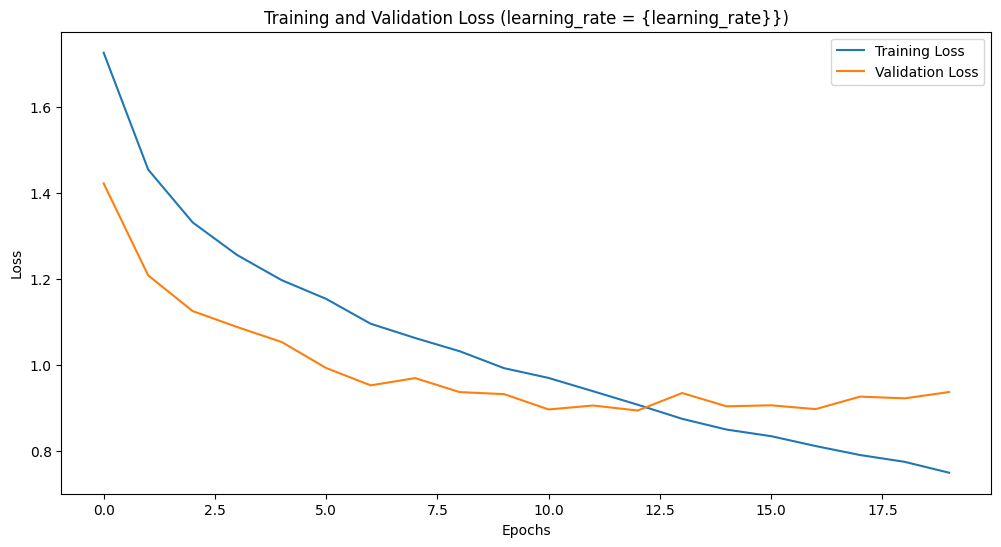

In [161]:
# Compile the model
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
cnn_model = create_cnn_model()
cnn_model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model for 20 epochs
num_epochs = 20
history = cnn_model.fit(train_images,
                        train_labels,
                        epochs=num_epochs,
                        validation_data=(valid_images, valid_labels))

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss (learning_rate = {learning_rate}})')
plt.show()

In [162]:
from sklearn.metrics import confusion_matrix

# Evaluate the model on the train and test data
train_loss, train_accuracy = cnn_model.evaluate(train_images, train_labels)
test_loss, test_accuracy = cnn_model.evaluate(test_images, test_labels)

# Make predictions on the train and test data
train_predictions = cnn_model.predict(train_images)
train_predicted_labels = np.argmax(train_predictions, axis=1)
test_predictions = cnn_model.predict(test_images)
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Generate confusion matrix
train_confusion_mtx = confusion_matrix(train_labels, train_predicted_labels)
test_confusion_mtx = confusion_matrix(test_labels, test_predicted_labels)


print("\nTraining Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Training Confusion Matrix:")
print(train_confusion_mtx)
print("\n\nTesting Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Testing Confusion Matrix:")
print(test_confusion_mtx)

313/313 [==============================] - 1s 4ms/step

Training Accuracy: 84.74%
Training Confusion Matrix:
[[3486   20  139   37   33    8    2   45  200   57]
 [  35 3700    7   16    5    1   14    6   34  203]
 [ 158    2 2868  173  331  202  142   67   21    6]
 [  23    6  104 2767  170  708  123   40   18   18]
 [  55    2  162   98 3427   88   85  144    4    2]
 [   3    1   63  516  132 3141   32   85    5    7]
 [   3    9  119  201  109   52 3503    2    1    5]
 [   8    0   42   69  118  169    1 3582    2   15]
 [ 140   25   33   46    8    6    8    4 3687   26]
 [  50   67    4   34    5    8    2   15   39 3736]]


Testing Accuracy: 69.36%
Testing Confusion Matrix:
[[729  19  49  28  23   6   6  16  76  48]
 [ 17 783   9  11   4   3   9   6  25 133]
 [ 72   4 514  74 107  97  70  38  12  12]
 [ 14   8  51 496  77 230  59  32  18  15]
 [ 34   4  84  68 648  42  46  64   7   3]
 [  7   3  46 174  54 640  18  43   5  10]
 [  2   8  37  94  62  33 751   7   1   5]
 [ 12 

Plot training and validation loss for different learning rates

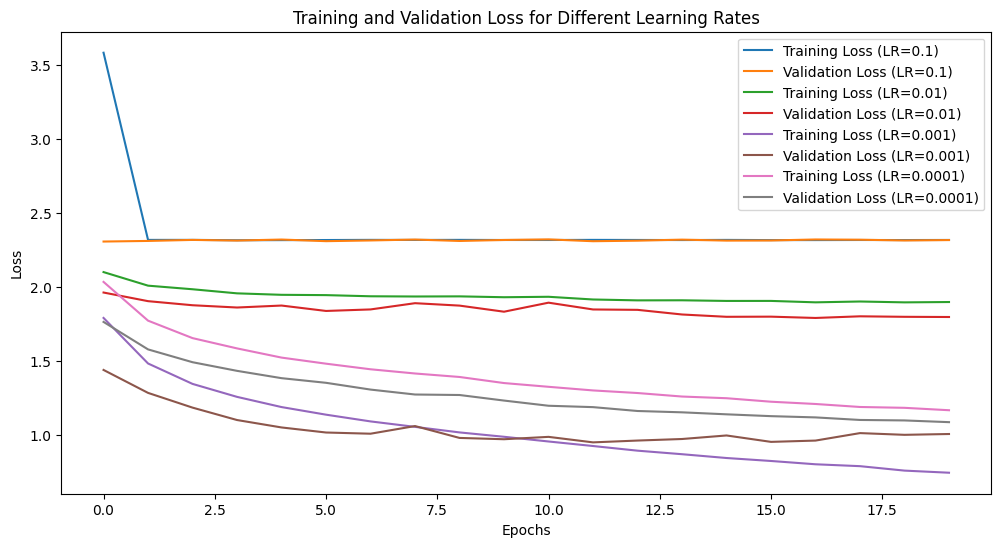

In [53]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]

plt.figure(figsize=(12, 6))

for lr in learning_rates:
    cnn_model = create_cnn_model()
    cnn_model.compile(optimizer=Adam(learning_rate=lr),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

    # Train the model for 20 epochs
    history = cnn_model.fit(train_images,
                            train_labels,
                            epochs=20,
                            validation_split=0.2,
                            verbose=0)

    # Plot training and validation loss
    plt.plot(history.history['loss'], label=f'Training Loss (LR={lr})')
    plt.plot(history.history['val_loss'], label=f'Validation Loss (LR={lr})')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss for Different Learning Rates')
plt.show()

# Using DenseNet and VGG

In [164]:
from tensorflow.keras.applications import DenseNet121, VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

In [167]:
train_labels_encoded = to_categorical(train_labels, num_classes=10)
test_labels_encoded = to_categorical(test_labels, num_classes=10)
valid_labels_encoded = to_categorical(valid_labels, num_classes=10)

In [168]:
densenet_base = DenseNet121(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
x = densenet_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)
densenet_model = Model(inputs=densenet_base.input, outputs=predictions)

for layer in densenet_base.layers:
    layer.trainable = False

densenet_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
densenet_checkpoint = ModelCheckpoint('densenet_fine_tuned.h5', save_best_only=True)
densenet_history = densenet_model.fit(train_images, train_labels_encoded, epochs=20, validation_data=(valid_images, valid_labels_encoded), callbacks=[densenet_checkpoint])

Epoch 1/20
1250/1250 [==============================] - ETA: 0s - loss: 1.2418 - accuracy: 0.5666

c:\Users\ladca\OneDrive\Documents\GitHub\Sentiment-Analysis-Project\env\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 108s 81ms/step - loss: 1.2418 - accuracy: 0.5666 - val_loss: 1.0832 - val_accuracy: 0.6167
Epoch 2/20
1250/1250 [==============================] - 98s 78ms/step - loss: 1.0366 - accuracy: 0.6320 - val_loss: 1.0794 - val_accuracy: 0.6239
Epoch 3/20
1250/1250 [==============================] - 99s 79ms/step - loss: 0.9551 - accuracy: 0.6627 - val_loss: 1.0354 - val_accuracy: 0.6380
Epoch 4/20
1250/1250 [==============================] - 94s 75ms/step - loss: 0.8866 - accuracy: 0.6847 - val_loss: 1.0380 - val_accuracy: 0.6445
Epoch 5/20
1250/1250 [==============================] - 98s 79ms/step - loss: 0.8178 - accuracy: 0.7090 - val_loss: 1.0155 - val_accuracy: 0.6479
Epoch 6/20
1250/1250 [==============================] - 101s 81ms/step - loss: 0.7600 - accuracy: 0.7277 - val_loss: 1.0548 - val_accuracy: 0.6426
Epoch 7/20
1250/1250 [==============================] - 102s 82ms/step - loss: 0.7006 - accuracy: 0.7494 - val_loss: 1.0670 - val_acc

In [169]:
densenet_train_loss = densenet_history.history['loss']
densenet_val_loss = densenet_history.history['val_loss']

densenet_model.load_weights('densenet_fine_tuned.h5')
densenet_test_loss, densenet_test_acc = densenet_model.evaluate(test_images, test_labels_encoded)

print(f'DenseNet Test Accuracy: {densenet_test_acc}')

313/313 [==============================] - 21s 67ms/step - loss: 1.0496 - accuracy: 0.6454
DenseNet Test Accuracy: 0.6453999876976013


In [170]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
x = vgg_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)
vgg_model = Model(inputs=vgg_base.input, outputs=predictions)

for layer in vgg_base.layers:
    layer.trainable = False

vgg_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
vgg_checkpoint = ModelCheckpoint('vgg_fine_tuned.h5', save_best_only=True)
vgg_history = vgg_model.fit(train_images, train_labels_encoded, epochs=10, validation_data=(test_images, test_labels_encoded), callbacks=[vgg_checkpoint])

Epoch 1/10
1250/1250 [==============================] - 235s 187ms/step - loss: 1.3741 - accuracy: 0.5220 - val_loss: 1.2660 - val_accuracy: 0.5521
Epoch 2/10
1250/1250 [==============================] - 240s 192ms/step - loss: 1.1872 - accuracy: 0.5850 - val_loss: 1.2256 - val_accuracy: 0.5701
Epoch 3/10
1250/1250 [==============================] - 230s 184ms/step - loss: 1.1216 - accuracy: 0.6091 - val_loss: 1.1820 - val_accuracy: 0.5865
Epoch 4/10
1250/1250 [==============================] - 231s 185ms/step - loss: 1.0713 - accuracy: 0.6249 - val_loss: 1.1626 - val_accuracy: 0.5946
Epoch 5/10
1250/1250 [==============================] - 236s 189ms/step - loss: 1.0263 - accuracy: 0.6403 - val_loss: 1.1441 - val_accuracy: 0.6012
Epoch 6/10
1250/1250 [==============================] - 230s 184ms/step - loss: 0.9883 - accuracy: 0.6555 - val_loss: 1.1752 - val_accuracy: 0.5916
Epoch 7/10
1250/1250 [==============================] - 232s 186ms/step - loss: 0.9514 - accuracy: 0.6672 - val_

In [171]:
vgg_train_loss = vgg_history.history['loss']
vgg_val_loss = vgg_history.history['val_loss']

vgg_model.load_weights('vgg_fine_tuned.h5')
vgg_test_loss, vgg_test_acc = vgg_model.evaluate(test_images, test_labels_encoded)
print(f'VGG Test Accuracy: {vgg_test_acc}')

313/313 [==============================] - 46s 146ms/step - loss: 1.1282 - accuracy: 0.6081
VGG Test Accuracy: 0.6080999970436096
